In [164]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
df = pd.read_csv('./data/부산/부산복합자재창고_발전량.csv', encoding='euc-kr') # 부산관측소와의 거리 : 3.6km
df.shape
df.head()
df.tail()

(2769, 10)

,년월일,총량(kw),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10)
0,2013-01-01,507.36,-2.8,8.0,NaN,3.1,48.5,9.9,8.99,3.4
1,2013-01-02,625.20,-5.9,3.6,NaN,4.0,40.9,9.9,10.30,1.5
2,2013-01-03,656.88,-7.7,-1.0,NaN,3.9,26.3,9.9,10.77,2.8
3,2013-01-04,701.28,-8.1,2.8,NaN,3.7,24.6,9.9,11.36,0.3
4,2013-01-05,686.40,-3.8,3.4,NaN,3.4,26.4,9.9,11.14,0.8


,년월일,총량(kw),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10)
2764,2020-07-27,207.36,21.5,24.7,32.1,1.8,94.4,14.0,4.23,9.9
2765,2020-07-28,163.44,21.5,22.8,46.5,1.5,96.6,14.0,3.69,10.0
2766,2020-07-29,301.92,21.9,24.8,14.3,1.2,96.5,14.0,7.94,10.0
2767,2020-07-30,386.88,22.0,27.9,50.0,2.8,91.5,14.0,13.13,8.9
2768,2020-07-31,804.96,22.8,30.6,NaN,2.5,84.0,13.9,22.12,7.4


In [3]:
#df.drop(['일강수량(mm)'], axis=1, inplace=True) # 결측치가 많은 일강수량 제거

In [4]:
df.describe()

,총량(kw),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10)
count,2769.000000,2769.000000,2769.000000,899.000000,2768.000000,2769.000000,2769.000000,2696.000000,2769.000000
mean,661.205980,12.025424,19.490321,13.320690,3.164451,63.362586,12.229577,14.553190,4.793391
std,301.817826,8.701013,7.741368,25.088904,1.150692,18.232092,1.633822,7.233134,3.301401
min,0.000000,-10.700000,-4.200000,0.000000,0.300000,17.000000,9.800000,0.170000,0.000000
25%,448.320000,4.700000,13.000000,0.300000,2.400000,49.300000,10.600000,9.547500,1.800000
50%,694.800000,12.800000,20.500000,2.600000,3.000000,64.900000,12.300000,13.860000,4.600000
75%,916.320000,19.300000,25.700000,14.550000,3.700000,77.600000,13.800000,20.207500,7.800000
max,1174.080000,28.300000,37.300000,264.100000,10.100000,99.900000,14.500000,34.680000,10.000000


In [5]:
from statsmodels.formula.api import ols

In [6]:
df.isnull().sum()

년월일                 0
총량(kw)              0
최저기온(°C)            0
최고기온(°C)            0
일강수량(mm)         1870
평균 풍속(m/s)          1
평균 상대습도(%)          0
가조시간(hr)            0
합계 일사량(MJ/m2)      73
평균 전운량(1/10)        0
dtype: int64

In [7]:
#df.dropna(axis=0, how='any', inplace=True)
df = df.fillna(0)
df.isnull().sum()

년월일              0
총량(kw)           0
최저기온(°C)         0
최고기온(°C)         0
일강수량(mm)         0
평균 풍속(m/s)       0
평균 상대습도(%)       0
가조시간(hr)         0
합계 일사량(MJ/m2)    0
평균 전운량(1/10)     0
dtype: int64

In [8]:
df.shape
df.head()
df.tail()

(2769, 10)

,년월일,총량(kw),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10)
0,2013-01-01,507.36,-2.8,8.0,0.0,3.1,48.5,9.9,8.99,3.4
1,2013-01-02,625.20,-5.9,3.6,0.0,4.0,40.9,9.9,10.30,1.5
2,2013-01-03,656.88,-7.7,-1.0,0.0,3.9,26.3,9.9,10.77,2.8
3,2013-01-04,701.28,-8.1,2.8,0.0,3.7,24.6,9.9,11.36,0.3
4,2013-01-05,686.40,-3.8,3.4,0.0,3.4,26.4,9.9,11.14,0.8


,년월일,총량(kw),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10)
2764,2020-07-27,207.36,21.5,24.7,32.1,1.8,94.4,14.0,4.23,9.9
2765,2020-07-28,163.44,21.5,22.8,46.5,1.5,96.6,14.0,3.69,10.0
2766,2020-07-29,301.92,21.9,24.8,14.3,1.2,96.5,14.0,7.94,10.0
2767,2020-07-30,386.88,22.0,27.9,50.0,2.8,91.5,14.0,13.13,8.9
2768,2020-07-31,804.96,22.8,30.6,0.0,2.5,84.0,13.9,22.12,7.4


In [9]:
corr = df.corr()
corr

,총량(kw),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10)
총량(kw),1.000000,0.002854,0.179740,-0.411730,0.087024,-0.445413,0.213312,0.830787,-0.698372
최저기온(°C),0.002854,1.000000,0.963247,0.155091,-0.057743,0.700947,0.766197,0.184561,0.376072
최고기온(°C),0.179740,0.963247,1.000000,0.068088,-0.081338,0.575998,0.747651,0.328554,0.210844
일강수량(mm),-0.411730,0.155091,0.068088,1.000000,0.055695,0.388610,0.126573,-0.330428,0.365695
평균 풍속(m/s),0.087024,-0.057743,-0.081338,0.055695,1.000000,-0.067207,0.060040,0.064918,-0.070977
평균 상대습도(%),-0.445413,0.700947,0.575998,0.388610,-0.067207,1.000000,0.529217,-0.229776,0.661994
가조시간(hr),0.213312,0.766197,0.747651,0.126573,0.060040,0.529217,1.000000,0.410591,0.297394
합계 일사량(MJ/m2),0.830787,0.184561,0.328554,-0.330428,0.064918,-0.229776,0.410591,1.000000,-0.510636
평균 전운량(1/10),-0.698372,0.376072,0.210844,0.365695,-0.070977,0.661994,0.297394,-0.510636,1.000000


In [12]:
sns.set(font_scale=1.2)

<Figure size 720x576 with 0 Axes>

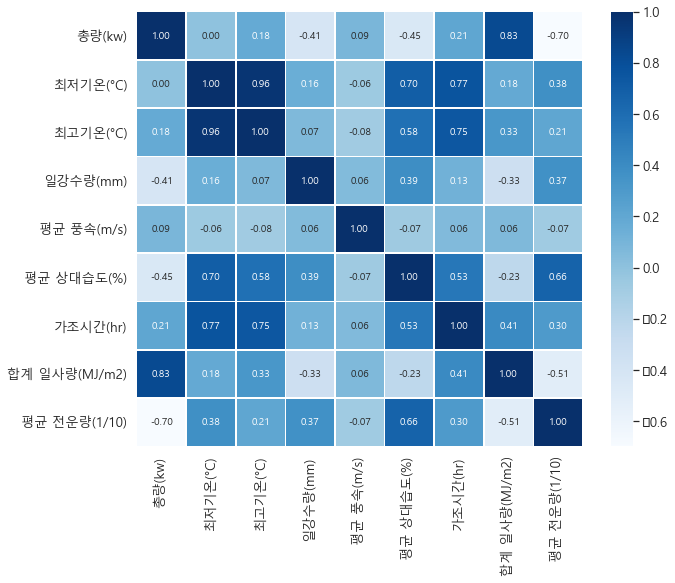

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True,
fmt='.2f', linewidths=.5, cmap='Blues')

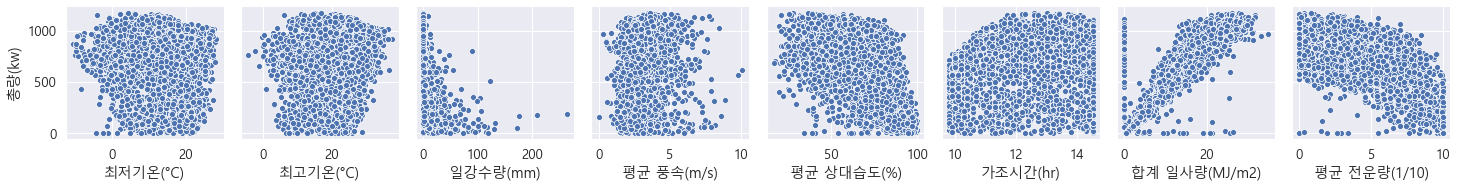

In [15]:
sns.pairplot(df, x_vars=['최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)',
       '가조시간(hr)', '합계 일사량(MJ/m2)', '평균 전운량(1/10)'],y_vars=['총량(kw)'])
#sns.pairplot(df, x_vars=['최저기온(°C)', '최고기온(°C)', '평균 풍속(m/s)', '평균 상대습도(%)',
#       '가조시간(hr)', '합계 일사량(MJ/m2)', '평균 전운량(1/10)'],y_vars=['총량(kw)'])

In [12]:
df.head()

,년월일,총량(kw),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10)
0,2013-01-01,507.36,-2.8,8.0,0.0,3.1,48.5,9.9,8.99,3.4
1,2013-01-02,625.20,-5.9,3.6,0.0,4.0,40.9,9.9,10.30,1.5
2,2013-01-03,656.88,-7.7,-1.0,0.0,3.9,26.3,9.9,10.77,2.8
3,2013-01-04,701.28,-8.1,2.8,0.0,3.7,24.6,9.9,11.36,0.3
4,2013-01-05,686.40,-3.8,3.4,0.0,3.4,26.4,9.9,11.14,0.8


### 최소자승법 OLS를 적용한 회귀분석

In [16]:
from statsmodels.formula.api import ols

In [17]:
# X = df.drop(['일시', ,'총량(kw)'], axis='columns')
X = df[['합계 일사량(MJ/m2)']]
y = df['총량(kw)']
res = ols('y ~ X', data=df).fit()

In [18]:
X.head()
X.shape
y.head()
y.shape

,합계 일사량(MJ/m2)
0,8.99
1,10.30
2,10.77
3,11.36
4,11.14


(2769, 1)

0    507.36
1    625.20
2    656.88
3    701.28
4    686.40
Name: 총량(kw), dtype: float64

(2769,)

In [19]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 05 Dec 2020   Prob (F-statistic):                nan
Time:                        11:41:17   Log-Likelihood:                    nan
No. Observations:                2769   AIC:                               nan
Df Residuals:                    2769   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept         nan        nan        nan        nan         nan         nan
X                 nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
X = df.drop(['년월일', '총량(kw)'], axis='columns')
y = df['총량(kw)']
res = ols('y ~ X', data=df).fit()

In [21]:
X.isnull().sum()

최저기온(°C)         0
최고기온(°C)         0
일강수량(mm)         0
평균 풍속(m/s)       0
평균 상대습도(%)       0
가조시간(hr)         0
합계 일사량(MJ/m2)    0
평균 전운량(1/10)     0
dtype: int64

In [22]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1721.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:41:19   Log-Likelihood:                -17261.
No. Observations:                2769   AIC:                         3.454e+04
Df Residuals:                    2760   BIC:                         3.459e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.1976     32.652      0.864      0.388     -35.827      92.223
X[0]         -17.6899      1.527    -11.588      0.000     -20.683     -14.696
X[1]          21.1950      1.550     13.673      0.000      18.155      24.234
X[2]          -1.3997      0.172     -8.121      0.000      -1.738      -1.062
X[3]           7.9114      2.115      3.740      0.000       3.764      12.059
X[4]          -2.8817      0.242    -11.906      0.000      -3.356      -2.407
X[5]          40.7951      2.791     14.614      0.000      35.322      46.269
X[6]          16.9905      0.546     31.132      0.000      15.920      18.061
X[7]         -29.9148      1.213    -24.668      0.000     -32.293     -27.537
==============================================================================
Omnibus:                      948.547   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21657.144
Skew:                          -1.081   Prob(JB):                         0.00
Kurtosis:                      16.529   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
res.params

Intercept    28.197607
X[0]        -17.689852
X[1]         21.194963
X[2]         -1.399653
X[3]          7.911411
X[4]         -2.881735
X[5]         40.795112
X[6]         16.990504
X[7]        -29.914817
dtype: float64

In [24]:
#res.predict(exog=dict(X)) # 동일한 결과 나옴
res.predict(X)

0        586.955984
1        656.653856
2        601.377223
3        777.122133
4        687.516880
5        642.399979
6        766.313542
7        731.493654
8        658.431448
9        808.224704
10       787.562595
11       703.642685
12       245.710568
13       707.113348
14       630.678654
15       648.116240
16       523.049759
17       810.414455
18       765.232394
19       461.617047
20       -26.524950
21       115.945678
22       165.921468
23       508.741603
24       785.312330
25       800.741262
26       749.728705
27       858.724161
28       633.254217
29       629.994706
           ...     
2739     732.103445
2740     376.761372
2741     537.487473
2742     737.351095
2743     342.113183
2744     623.472084
2745     905.839481
2746     441.617765
2747      74.751784
2748     414.742780
2749     220.820085
2750      58.188195
2751     257.356480
2752     359.110232
2753     890.898328
2754    1124.610674
2755     674.712344
2756     279.817543
2757     426.705693


In [25]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle=False)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
X_train
X_test

X_train shape: (2492, 8)
X_test shape: (277, 8)
y_train shape: (2492,)
y_test shape: (277,)


,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10)
0,-2.8,8.0,0.0,3.1,48.5,9.9,8.99,3.4
1,-5.9,3.6,0.0,4.0,40.9,9.9,10.30,1.5
2,-7.7,-1.0,0.0,3.9,26.3,9.9,10.77,2.8
3,-8.1,2.8,0.0,3.7,24.6,9.9,11.36,0.3
4,-3.8,3.4,0.0,3.4,26.4,9.9,11.14,0.8
5,-2.8,6.6,0.0,3.9,33.6,9.9,11.10,3.4
6,-2.0,7.1,0.0,3.7,17.6,9.9,11.58,0.9
7,-1.9,7.0,0.0,2.7,27.1,9.9,10.78,0.3
8,-4.0,2.5,0.0,3.1,25.5,9.9,11.21,1.3
9,-5.8,4.5,0.0,3.9,22.4,10.0,12.23,0.0


,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10)
2492,13.3,21.2,0.0,3.1,57.1,10.9,14.31,0.4
2493,10.6,20.4,0.0,2.9,47.1,10.8,17.14,0.0
2494,11.0,22.4,0.0,3.3,50.8,10.8,16.63,0.0
2495,13.4,24.0,0.0,2.4,56.1,10.8,15.02,0.6
2496,14.4,22.6,0.0,2.1,67.1,10.7,12.55,4.8
2497,14.0,22.3,2.3,2.2,71.9,10.7,10.07,6.3
2498,12.3,19.7,0.0,2.7,64.8,10.7,9.58,3.6
2499,10.8,20.7,0.0,1.4,58.8,10.6,15.37,0.0
2500,11.7,21.3,0.0,2.4,52.1,10.6,15.23,1.8
2501,11.7,19.2,0.0,2.3,51.4,10.6,13.06,4.0


In [43]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions[0:5]

array([781.94119558, 894.71413068, 914.78105938, 838.75338467,
       581.91567866])

<Figure size 864x864 with 0 Axes>

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

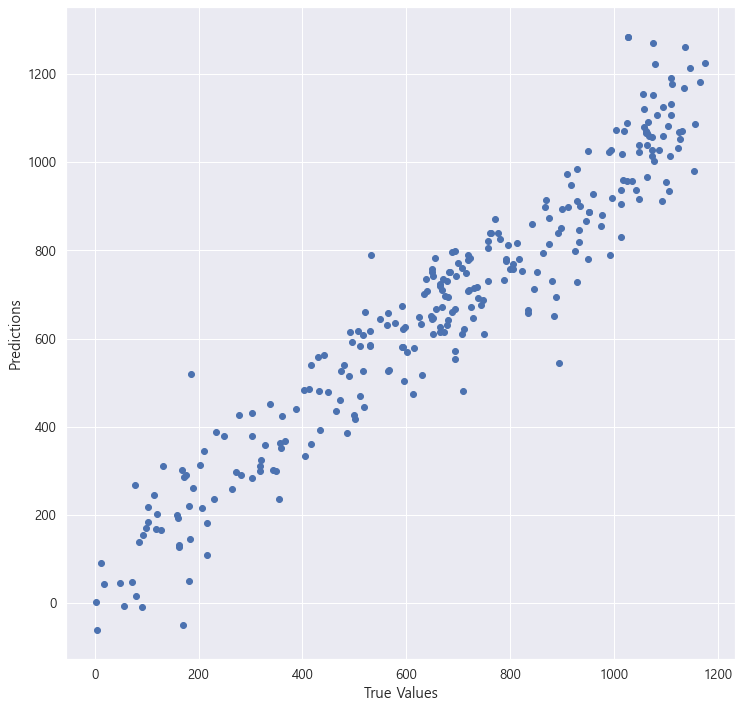

In [44]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [45]:
model.score(X_test, y_test)
# test = 0.1 -> 0.916786242771979
# test = 0.2 -> 0.9047922607210598

0.916786242771979

<Figure size 2880x864 with 0 Axes>

Text(0.5, 0, 'index')

Text(0, 0.5, '발전량')

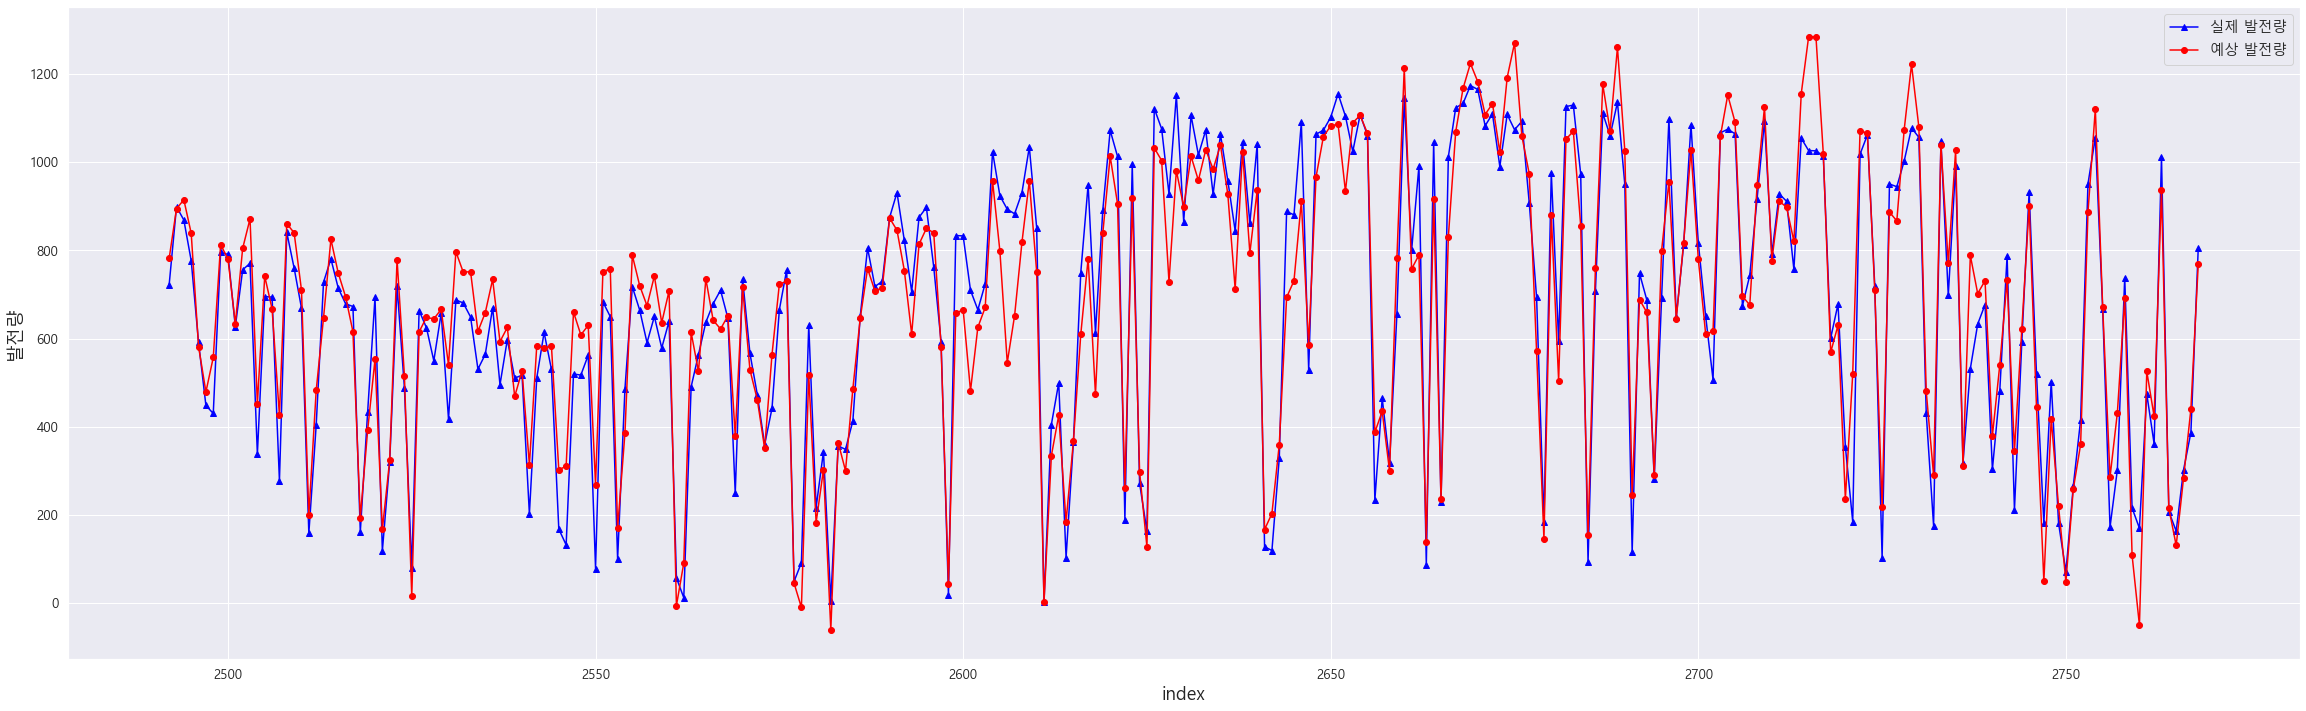

In [46]:
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('발전량', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 발전량')
plt.plot(list, predictions, color='red', marker='o', label='예상 발전량')
plt.legend(fontsize='x-large')
plt.savefig('./predictions_1.png') # test = 0.1
#plt.savefig('./predictions_2.png') # test = 0.2
plt.show()

### Ridge_Lasso 회귀

In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [141]:
# model_ridge_alpha_10
model_ridge_alpha_10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 세트 점수: {:f}".format(model_ridge_alpha_10.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(model_ridge_alpha_10.score(X_test, y_test)))

훈련 세트 점수: 0.822314
테스트 세트 점수: 0.917328


<Figure size 2880x864 with 0 Axes>

Text(0.5, 0, 'index')

Text(0, 0.5, '발전량')

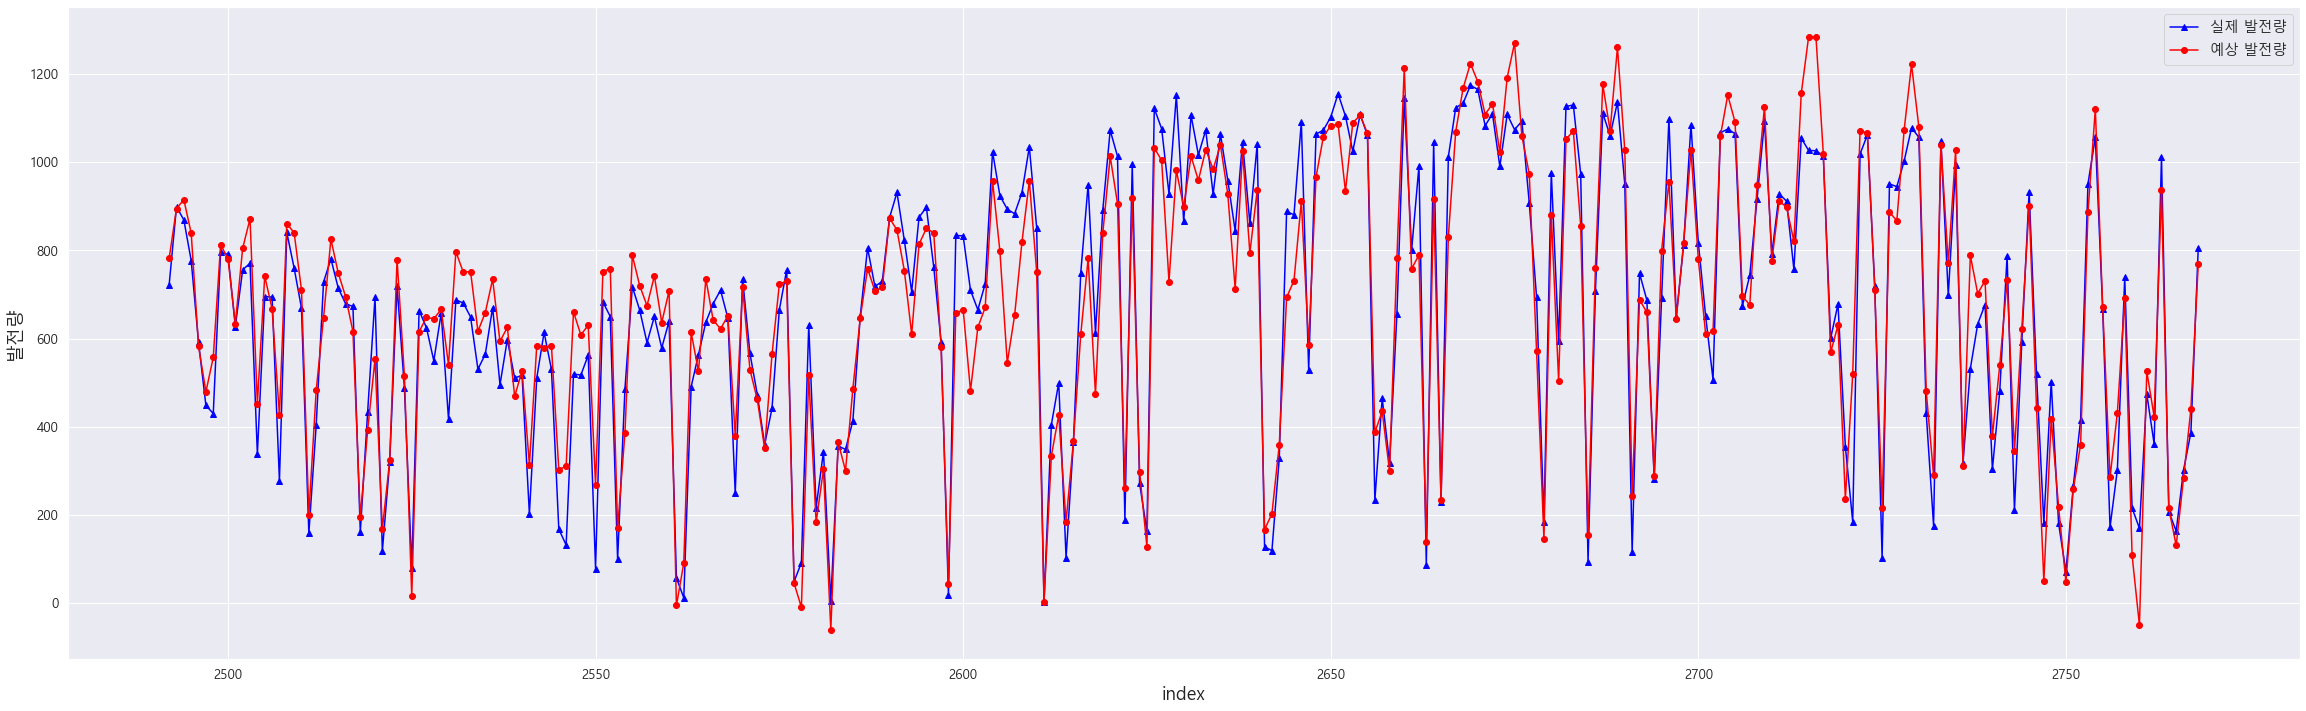

In [75]:
predictions = model_ridge_alpha_10.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('발전량', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 발전량')
plt.plot(list, predictions, color='red', marker='o', label='예상 발전량')
plt.legend(fontsize='x-large')
# plt.savefig('./predictions_1.png') # test = 0.1
plt.savefig('./predictions_2.png') # test = 0.2
plt.show()

### Lasso Regression

In [54]:
# lasso001
model_lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)

print("훈련 세트 점수: {:f}".format(model_lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(model_lasso001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(   np.sum( model_lasso001.coef_ != 0 )   ))

훈련 세트 점수: 0.822373
테스트 세트 점수: 0.916791
사용한 특성의 수: 8


In [ ]:
sns.

<Figure size 2880x864 with 0 Axes>

Text(0.5, 0, 'index')

Text(0, 0.5, '발전량')

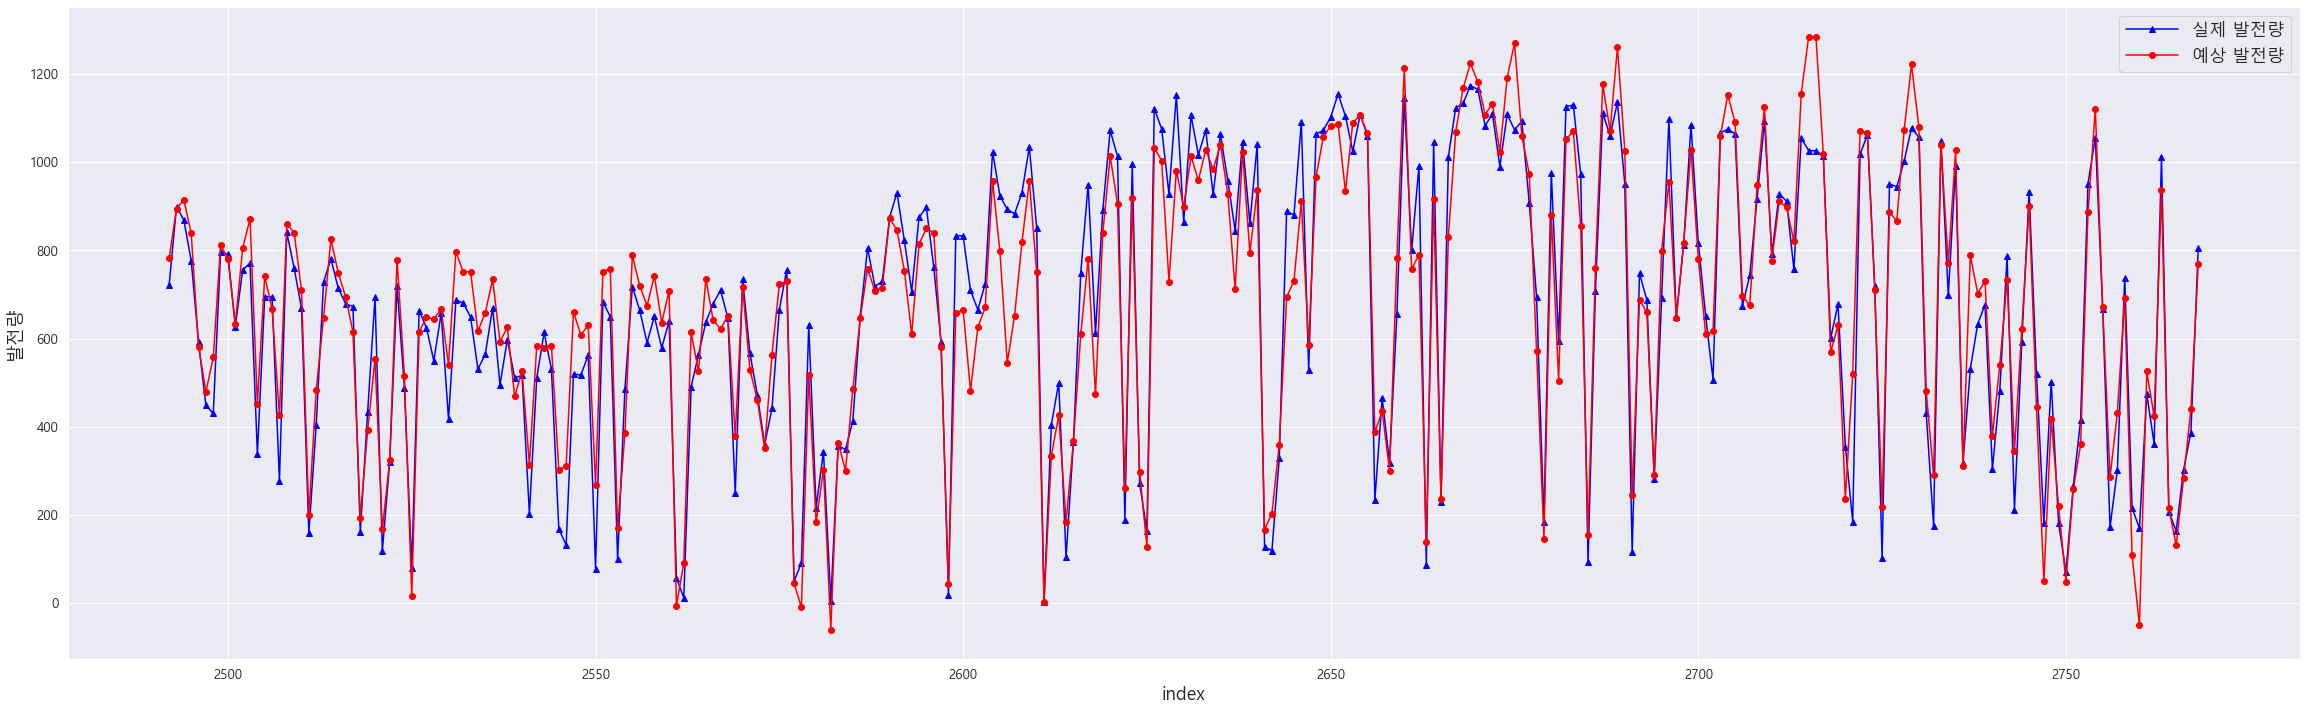

In [151]:
predictions = model_lasso001.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('발전량', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 발전량')
plt.plot(list, predictions, color='red', marker='o', label='예상 발전량')
plt.legend(fontsize='xx-large')
# plt.savefig('./predictions_1.png') # test = 0.1
plt.savefig('./predictions_2.png') # test = 0.2
plt.show()

### GradientBoosting

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

In [139]:
# 모델생성과 학습
model_gradient = GradientBoostingRegressor(n_estimators=500)
model_gradient.fit(X_train, y_train)

# 훈련과 테스트 스코어 비교
print("훈련 세트 점수: {:f}".format(model_gradient.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(model_gradient.score(X_test, y_test)))

GradientBoostingRegressor(n_estimators=500)

훈련 세트 점수: 0.974609
테스트 세트 점수: 0.941214


<Figure size 2880x864 with 0 Axes>

Text(0.5, 0, 'index')

Text(0, 0.5, '발전량')

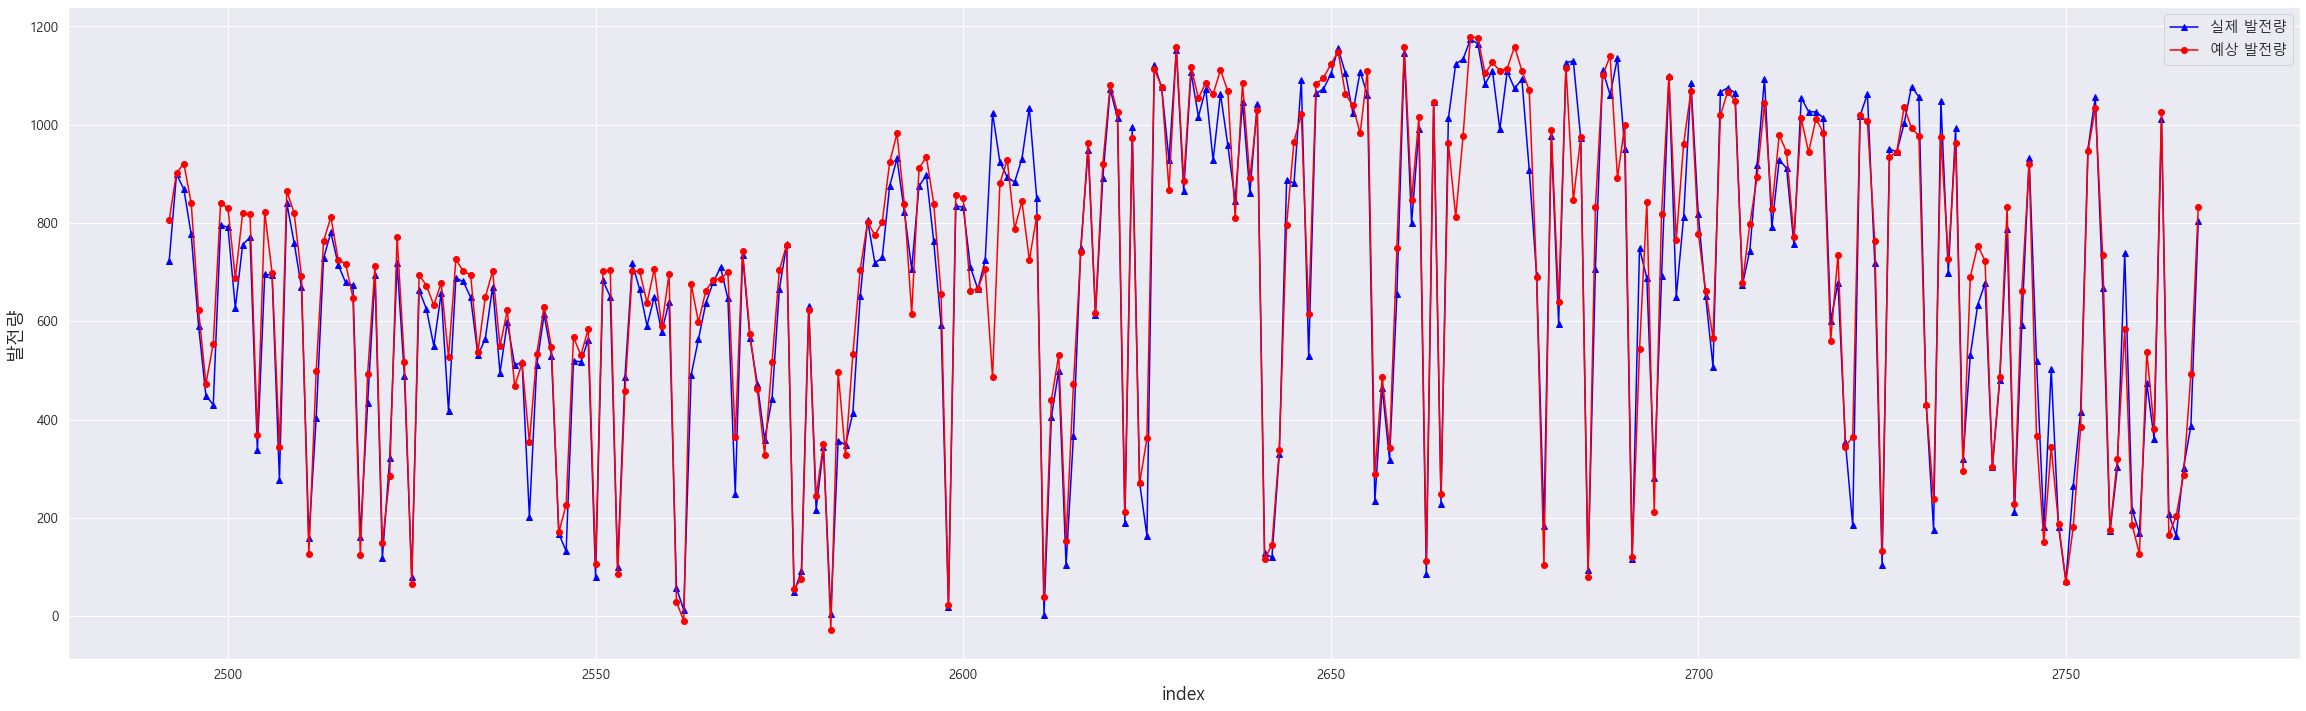

In [126]:
predictions = model_gradient.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('발전량', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 발전량')
plt.plot(list, predictions, color='red', marker='o', label='예상 발전량')
plt.legend(fontsize='x-large')
# plt.savefig('./predictions_1.png') # test = 0.1
plt.savefig('./predictions_2.png') # test = 0.2
plt.show()

### SVM

In [77]:
from sklearn.svm import SVR

In [108]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
SupportVectorRegModel = make_pipeline(StandardScaler(), SVR(C=1000.0, epsilon=0.2))
SupportVectorRegModel.fit(X_train, y_train)

# 훈련과 테스트 스코어 비교
print("훈련 세트 점수: {:f}".format(SupportVectorRegModel.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(SupportVectorRegModel.score(X_test, y_test)))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1000.0, epsilon=0.2))])

훈련 세트 점수: 0.915043
테스트 세트 점수: 0.953511


<Figure size 2880x864 with 0 Axes>

Text(0.5, 0, 'index')

Text(0, 0.5, '발전량')

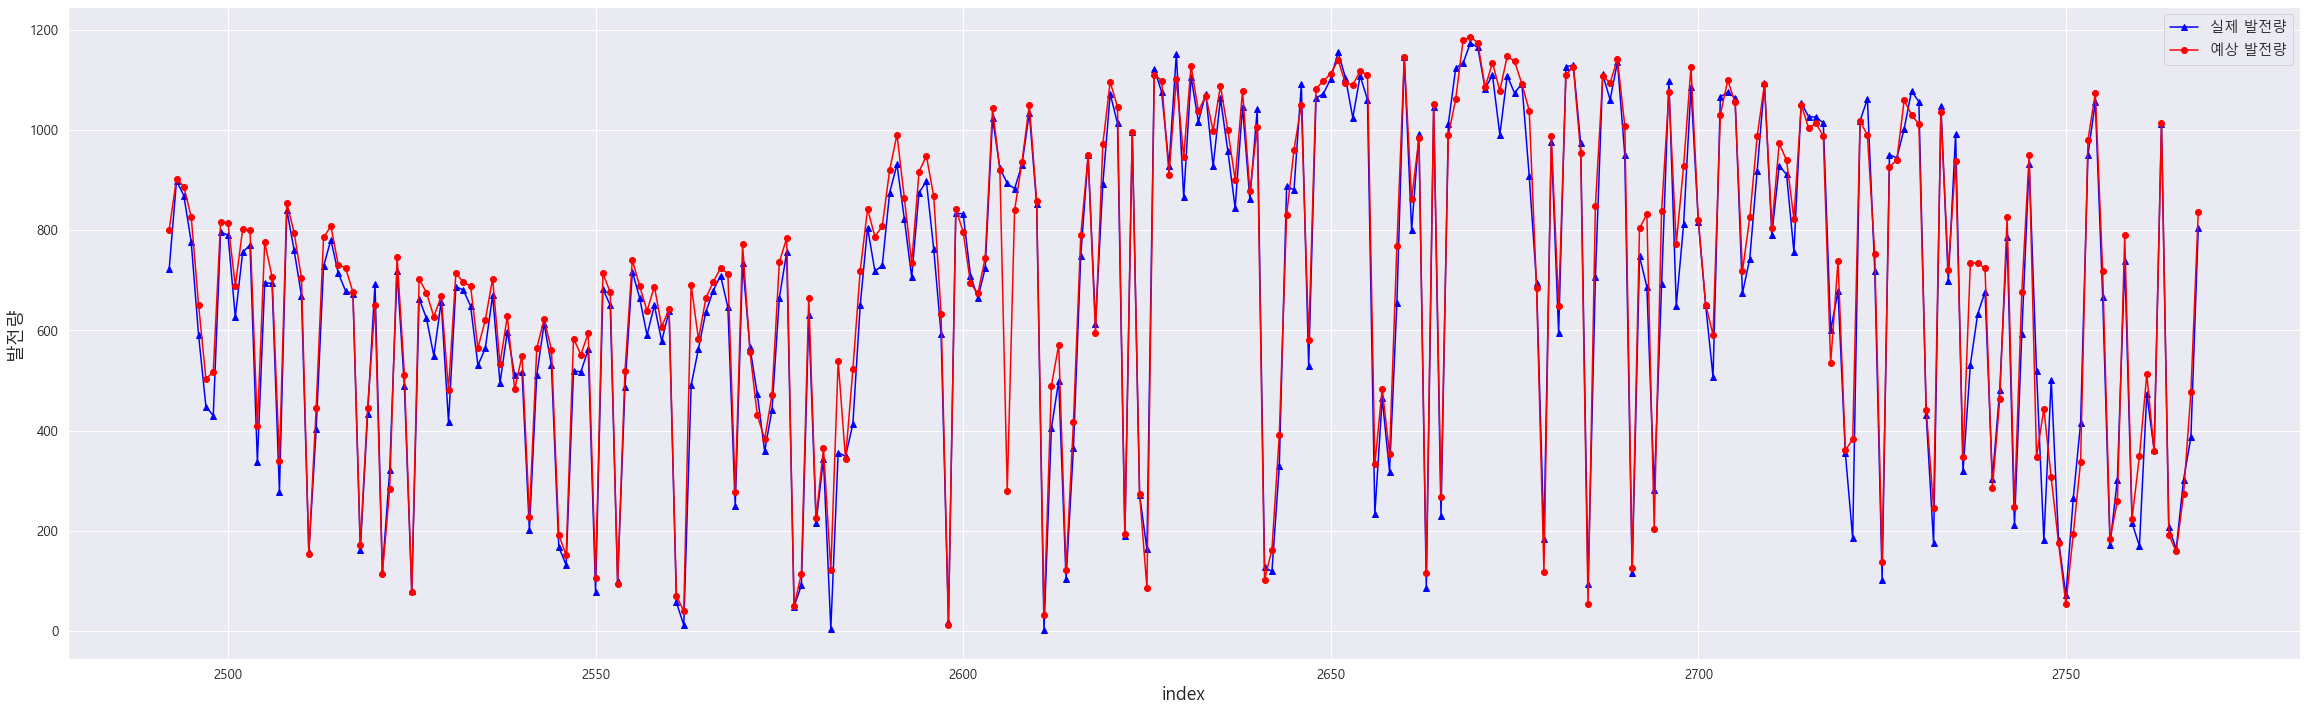

In [106]:
predictions = SupportVectorRegModel.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('발전량', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 발전량')
plt.plot(list, predictions, color='red', marker='o', label='예상 발전량')
plt.legend(fontsize='x-large')
# plt.savefig('./predictions_1.png') # test = 0.1
plt.savefig('./predictions_2.png') # test = 0.2
plt.show()

### Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [140]:
# 모델생성과 학습
model_randomForest = RandomForestRegressor(n_estimators=500)
model_randomForest.fit(X_train, y_train)

# 훈련과 테스트 스코어 비교
print("훈련 세트 점수: {:f}".format(model_randomForest.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(model_randomForest.score(X_test, y_test)))

RandomForestRegressor(n_estimators=500)

훈련 세트 점수: 0.985941
테스트 세트 점수: 0.959265


(0.0, 1.0, 0.0, 1.0)

<Figure size 2880x864 with 0 Axes>

Text(0.5, 0, 'index')

Text(0, 0.5, '발전량')

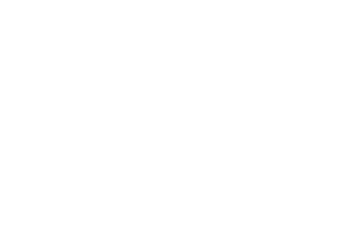

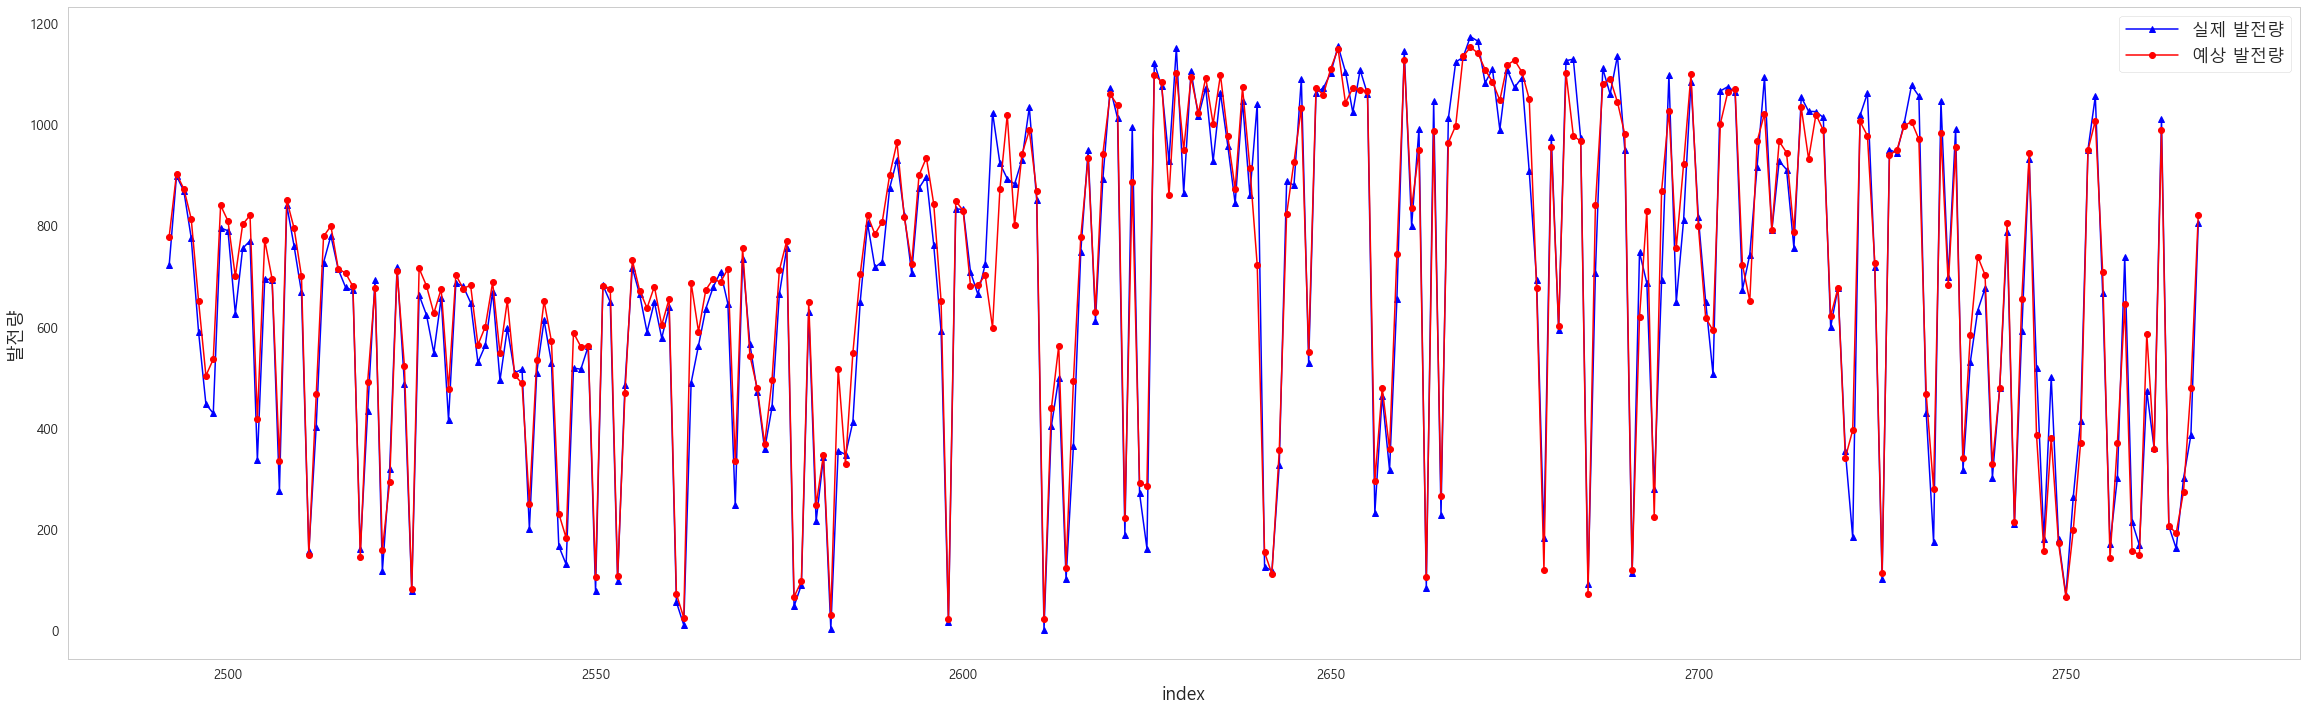

In [165]:
predictions = model_randomForest.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)
plt.axis("off")
plt.figure(figsize=(40,12))
plt.grid(False)
plt.xlabel('index', fontsize=18)
plt.ylabel('발전량', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 발전량')
plt.plot(list, predictions, color='red', marker='o', label='예상 발전량')
plt.legend(fontsize='xx-large')
# plt.savefig('./predictions_1.png') # test = 0.1
plt.savefig('./predictions_2.png') # test = 0.2
plt.show()